<a href="https://colab.research.google.com/github/komalkhatri101/Automated_Attendence_System/blob/main/Automated_attendence_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=f3eeac7711194f549a3476834854e7b7898771d4deae020497396118c8cfb495
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import face_recognition

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
import zipfile
image = zipfile.ZipFile('/content/train_images.zip')
image.extractall('train_images')
image.close()

In [ ]:

def get_encodings(paths):
  print('{} images found'.format(len(paths)))
  list_encodings = []
  list_names = []
  for img_path in paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    basename = os.path.basename(img_path)
    #print(basename)
    (name, ext) = os.path.splitext(basename)
    #print(name, ext)
    face_roi = face_recognition.face_locations(img, model = 'cnn') # hog
    face_encoding = face_recognition.face_encodings(img, face_roi)[0]
    if len(face_encoding) > 0:
      list_encodings.append(face_encoding)
      list_names.append(name)
    else:
      print('Could not detect the face from image {}'.format(img_path))
  return list_encodings, list_names

In [ ]:
paths = [os.path.join('/content/train_images/train_images', f)for f in os.listdir('/content/train_images/train_images')]
print(paths)

['/content/train_images/train_images/vikas.jpeg', '/content/train_images/train_images/vishal.jpeg', '/content/train_images/train_images/priyani.jpeg', '/content/train_images/train_images/yash.jpeg', '/content/train_images/train_images/komal.jpeg', '/content/train_images/train_images/purva.jpeg', '/content/train_images/train_images/vinay.jpeg', '/content/train_images/train_images/parul.jpeg']


In [ ]:
list_encodings, list_names = get_encodings(paths)

8 images found


In [ ]:
import imutils

In [ ]:

import numpy as np
def recognize_faces(image, list_encodings, list_names, tolerance = 0.6):
  img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  face_locations = face_recognition.face_locations(img_rgb)
  face_encodings = face_recognition.face_encodings(img_rgb, face_locations)
  face_names = []
  conf_values = []
  for encoding in face_encodings:
    matches = face_recognition.compare_faces(list_encodings, encoding, tolerance = tolerance)
    name = 'Not identified'
    face_distances = face_recognition.face_distance(list_encodings, encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
      name = list_names[best_match_index]
    face_names.append(name)
    conf_values.append(face_distances[best_match_index])
  face_locations = np.array(face_locations)
  return face_locations.astype(int), face_names, conf_values

In [ ]:
def show_recognition(test_image, list_encodings, list_names, max_width=700, tolerance=0.6):
  face_locations, face_names, conf_values = recognize_faces(test_image, list_encodings, list_names, tolerance)
  NAME_EXCEL=[]
  for face_loc, name, conf in zip(face_locations, face_names, conf_values):
    y1, x2, y2, x1 = face_loc[0], face_loc[1], face_loc[2], face_loc[3]
    NAME_EXCEL.append(name)
    cv2.putText(test_image, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 0.8, (0, 0, 255), 2)
    cv2.rectangle(test_image, (x1, y1), (x2, y2), (0, 10, 255), 4)
    print(conf)

  if (test_image.shape[1] > max_width):
    test_image = imutils.resize(test_image, width=max_width)
  cv2_imshow(test_image)
  return NAME_EXCEL

In [ ]:
test_image = cv2.imread('/content/test_image.jpeg')

0.496693823094828
0.5060880104482441
0.26364150454283114
0.26551341076882495
0.5113292470970264
0.4240736465944595
0.1986371332271551
0.5808984624541881


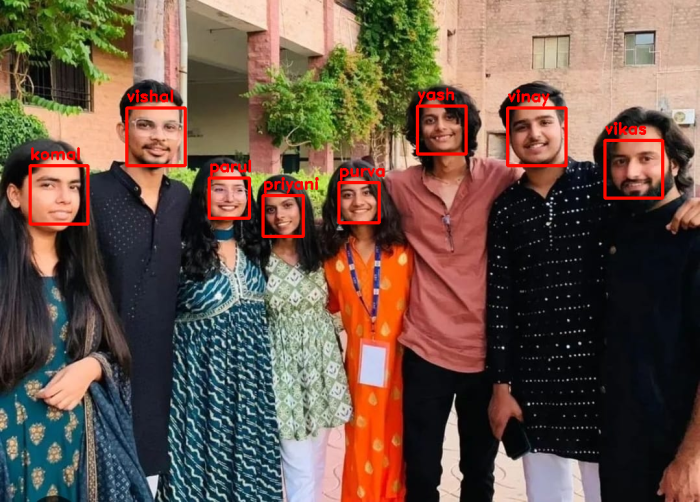

In [ ]:
name = show_recognition(test_image, list_encodings, list_names)

In [ ]:
name

['parul', 'komal', 'vikas', 'vishal', 'priyani', 'purva', 'vinay', 'yash']